# Современные методы анализа данных и машинного обучения, БИ

## НИУ ВШЭ, 2023-24 учебный год

# Семинар 15. Задача классификации


Сегодня мы с вами поговорим про решение важного блока задач классического машинного обучения — задач классификации; а также посмотрим на связь этих задач с задачами регрессии в разрезе знакомого нам KNN и пока еще не так хорошо знакомых — линейных моделей.

## Постановка задачи классификации

Если бы от нас требовалось описать задачу классификации всего в нескольких словах, то, вероятно, это было бы что-то в духе: "нужно как можно точнее разделить объекты по правильным группам".

Однако пусть вас не обманывает здесь кажущаяся простота формулировки — за этой простотой, на самом деле, скрывается довольно много всего сложного (но, конечно, и интересного!).


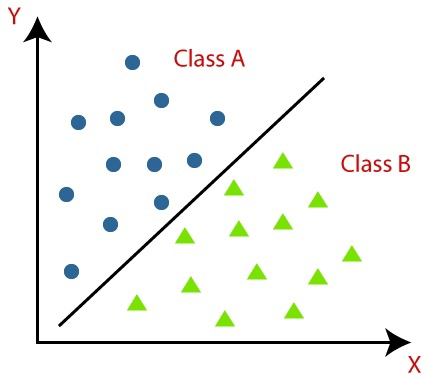

Для полноты картины приведем здесь более "строгое" определение задачи классификации.

Классификация —  это один из разделов машинного обучения, посвященный решению следующей задачи. Имеется множество объектов (ситуаций), разделённых некоторым образом на `классы`. Задано конечное множество `объектов`, для которых известно, к каким классам они относятся, — данное множество называется `обучающей выборкой`. Классовая принадлежность остальных объектов неизвестна. Требуется `построить алгоритм`, способный определять (предсказывать) класс для произвольного объекта из исходного множества.

Кстати говоря, именно задачу классификации мы с вами решали на вводном занятии по машинному обучению: если помните, там нам необходимо было по признаковому описанию клиента предсказать, собирается ли он от нас в скором времени уйти (churn) или же мы его удерживаем хорошо.

## Описание данных

In [1]:
# Импортируем нужные библиотеки
import pandas as pd
import numpy as np

Сегодня мы с вами будем решать задачу бинарной классификации — то есть классификации данных, в которых имеется всего два класса, — на датасете [Adult](https://archive.ics.uci.edu/ml/datasets/adult). В рамках данного датасета необходимо по признаковому описанию человека определить, зарабатывает ли этот человек больше 50 тысяч или же нет.

Ниже представлены признаки датасета:

* **age**;
* **workclass** *(Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.)*;
* **fnlwgt**;
* **education** *(Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool)*;
* **education-num**;
* **marital-status** *(Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse)*;
* **occupation** *(Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces)*;
* **relationship** *(Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried)*;
* **race** *(White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black)*;
* **sex**;
* **capital-gain**;
* **capital-loss**;
* **hours-per-week**;
* **native-country**.



In [2]:
column_names =  [
    'workclass',
    'fnlwgt',
    'education',
    'educ-num',
    'marital-status',
    'occupation',
    'relationship',
    'race',
    'sex',
    'capital-gain',
    'capital-loss',
    'hours-per-week',
    'native-country',
    'salary'
]

Загрузим данные при помощи `read_csv` по ссылке: https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data

Помним об аргументе `names`.

In [3]:
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data', names=column_names)

Проверим, что все загрузилось верно, выведя первые строчки датасета, и посмотрим на сами данные:

In [4]:
df.head()

,workclass,fnlwgt,education,educ-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Как мы уже обсудили, сегодня мы решаем задачу классификации. Что же является целевой переменной в представленном датасете?

## Подготовка данных

Для начала давайте осуществим предварительную подготовку данных: посмотрим на наши данные, найдем пропуски, закодируем признаки. Всё, как и обсуждали в модуле по EDA!

### Детектирование пропусков

Посмотрим, сколько пропусков имеется в наших данных.


In [5]:
df.isna().sum().sum()

0

Хм, где-то мы это уже видели... А что если попробовать с вопросительным знаком, как в прошлый раз?

In [6]:
(df == ' ?').sum()

workclass         1836
fnlwgt               0
education            0
educ-num             0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

Ну вот — это уже другой разговор! Мы видим с вами, что пропуски снова закодированы специальным символом, что не позволяет изначально обнаружить их в датасете при помощи стандартных функций работы с пропусками.

Избавимся от знаков вопроса и приведем всё к стандартному виду с `np.nan`, используя метод `replace`.

In [7]:
df = df.replace({" ?": np.nan})

Есть ли пропуски теперь?

In [8]:
df.isna().sum()

workclass         1836
fnlwgt               0
education            0
educ-num             0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

Отлично! Теперь это выглядит так, как и должно.

### Категориальные признаки

Прежде чем переходить к детектированию и последующей обработке категориальных признаков, давайте посмотрим на количество уникальных значений в каждом из наших столбцов.

In [9]:
df.nunique()

workclass             8
fnlwgt            21648
education            16
educ-num             16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        119
capital-loss         92
hours-per-week       94
native-country       41
salary                2
dtype: int64

Так, ну со столбцами `salary` и `sex` в плане кодировки всё совсем просто: это у нас бинарные признаки, а значит в рамках них мы просто заменим значения категорий на 0 и 1 (используя всё тот же самый `replace`)

In [10]:
df = df.replace({' Male':1, ' Female':0, ' <=50K':0, ' >50K':1})

Замечательно! Однако в датасете у нас есть еще и другие категориальные признаки. Давайте посмотрим на них при помощи `.select_dtypes(object))`

In [11]:
df.select_dtypes(object)

,workclass,education,marital-status,occupation,relationship,race,native-country
39,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,United-States
50,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,United-States
38,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,United-States
53,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,United-States
28,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Cuba
...,...,...,...,...,...,...,...
27,Private,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,United-States
40,Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,United-States
58,Private,HS-grad,Widowed,Adm-clerical,Unmarried,White,United-States
22,Private,HS-grad,Never-married,Adm-clerical,Own-child,White,United-States


В рамках текущей задачи выберем только те категориальные признаки, в которых меньше 10 уникальных значений; остальные — удалим.

Как и в прошлый раз, данный пункт представляет собой допущение, которое нужно для того, чтобы уменьшить сложность обработки датасета в контексте построения бейзлайна. Поэтому позднее в это место в любом случае стоит вернуться — когда вы будете заниматься улучшением качества работа алгоритма и модификацией бейзлайна!


In [12]:
df.drop(columns=df.select_dtypes(object).nunique()[df.select_dtypes(object).nunique() >= 10].index, inplace=True)
df.head()

,workclass,fnlwgt,educ-num,marital-status,relationship,race,sex,capital-gain,capital-loss,hours-per-week,salary
39,State-gov,77516,13,Never-married,Not-in-family,White,1,2174,0,40,0
50,Self-emp-not-inc,83311,13,Married-civ-spouse,Husband,White,1,0,0,13,0
38,Private,215646,9,Divorced,Not-in-family,White,1,0,0,40,0
53,Private,234721,7,Married-civ-spouse,Husband,Black,1,0,0,40,0
28,Private,338409,13,Married-civ-spouse,Wife,Black,0,0,0,40,0


Отлично, у нас остались только категориальные колонки со сравнительно небольшим количеством категорий.

Закодируем их пока что просто с использованием OHE (при помощи функции `pd.get_dummies`).

In [13]:
df = pd.get_dummies(
    df,
    columns=df.select_dtypes(object).columns,
    drop_first=True
)

df.head()

,fnlwgt,educ-num,sex,capital-gain,capital-loss,hours-per-week,salary,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,...,marital-status_ Widowed,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
39,77516,13,1,2174,0,40,0,False,False,False,...,False,True,False,False,False,False,False,False,False,True
50,83311,13,1,0,0,13,0,False,False,False,...,False,False,False,False,False,False,False,False,False,True
38,215646,9,1,0,0,40,0,False,False,True,...,False,True,False,False,False,False,False,False,False,True
53,234721,7,1,0,0,40,0,False,False,True,...,False,False,False,False,False,False,False,True,False,False
28,338409,13,0,0,0,40,0,False,False,True,...,False,False,False,False,False,True,False,True,False,False


Всё получилось!

Давайте теперь вернёмся к пропускам в наших данных и посмотрим, остались ли где-то они.

In [14]:
df.isna().sum()

fnlwgt                                   0
educ-num                                 0
sex                                      0
capital-gain                             0
capital-loss                             0
hours-per-week                           0
salary                                   0
workclass_ Local-gov                     0
workclass_ Never-worked                  0
workclass_ Private                       0
workclass_ Self-emp-inc                  0
workclass_ Self-emp-not-inc              0
workclass_ State-gov                     0
workclass_ Without-pay                   0
marital-status_ Married-AF-spouse        0
marital-status_ Married-civ-spouse       0
marital-status_ Married-spouse-absent    0
marital-status_ Never-married            0
marital-status_ Separated                0
marital-status_ Widowed                  0
relationship_ Not-in-family              0
relationship_ Other-relative             0
relationship_ Own-child                  0
relationshi

Ого, пропусков не осталось! Наше выкидывание ряда категориальных столбцов, а также кодирование оставшихся — и так само по себе победило пропуски в данных!

Ну что же — тем лучше для нас. Можем переходить с вами непосредственно к машинному обучению — датасет полностью готов!

## Машинное обучение

Итак, как мы с вами уже обсуждали, первым этапом, который необходимо осуществить дата саентисту после того, как он завершил работу с первичным анализом данных и приступает к ML, — является разделение данных на train и test. Но давайте всё же, прежде чем будем делать это, проверим одну быструю, но важную вещь.

In [15]:
print(f"Всего класса 0 в датастее: {(df['salary'] == 0).sum()}, а класса 1: {(df['salary'] == 1).sum()}")

Всего класса 0 в датастее: 24720, а класса 1: 7841


Мы проверили наши классы на предмет дисбаланса и... не зря! Из вывода ячейки выше можно увидеть, что в рамках текущего датасета мы имеем дело с сильно несбалансированной выборкой, где количество объектов положительного и отрицательного классов даже не близко друг к другу.

В таких случаях деление данных на train и test необходимо осуществлять не случайно, а с учетом одного важного условия!

### Задание для самостоятельного решения (разделение выборки на train и test)

Осуществите разделение датафрейма df на обучающую и тестовую выборку с использованием функции `train_test_split` из модуля `sklearn.model_selection`.

Пропорцию тестовой выборки установите как 25%. Значение `random_state` установите как 13.

Не забудьте также про важную фичу, о которой шёл разговор выше. Подсказка: мы когда-то уже делали с вами вместе такое! :)


In [19]:
from sklearn.model_selection import train_test_split

# your code here

# X_train, X_test, y_train, y_test = ...

In [20]:
X_train

,fnlwgt,educ-num,sex,capital-gain,capital-loss,hours-per-week,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,marital-status_ Widowed,relationship_ Not-in-family,relationship_ Other-relative,relationship_ Own-child,relationship_ Unmarried,relationship_ Wife,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
65,193216,9,1,9386,0,40,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
23,107801,13,0,0,0,20,False,False,True,False,...,False,False,False,True,False,False,False,False,False,True
47,386136,12,1,0,0,40,False,False,True,False,...,False,False,False,False,False,False,False,False,False,True
26,124111,12,0,0,0,36,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
37,175232,14,1,0,0,60,False,False,True,False,...,False,False,False,False,True,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32,128002,11,0,0,0,45,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
28,419146,4,1,0,0,40,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True
25,263773,10,0,0,0,40,False,False,True,False,...,False,False,False,False,False,True,False,False,False,True
25,236564,9,1,0,0,40,False,False,True,False,...,False,True,False,False,False,False,False,False,False,True


## Линейные модели

Отлично, обучающая и тестовая выборки готовы. Теперь нам необходимо выбрать модель, которая бы непосредственно классифицировала наши объекты. Однако с лекции мы что-то слышали с вами про линейные модели и знаем об их применении в задачах классификации. Давайте как раз и воспользуемся этим знанием!

### Связь линейной регрессии и классификации

Итак, интуиция: у нас есть алгоритм, который умеет неплохо
находить линейные зависимости (это линейная регрессия,
которую мы подробно обсуждали на лекции). Может, мы сможем приспособить этот алгоритм к тому, чтобы нарисовать линию, которая разделит между собой два класса? Всё, что здесь нужно, – придумать способ, как обучать его не «ложиться» вдоль точек, а наоборот делить их поперек.


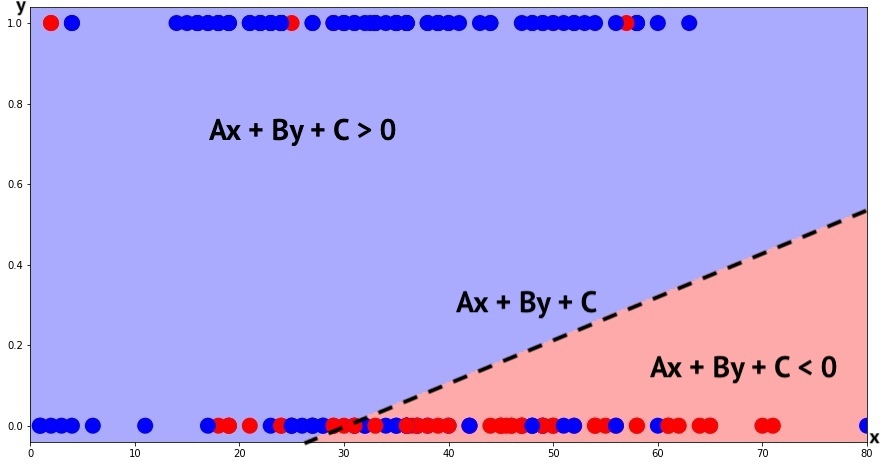

Глядя на пример выше с прямой, нетрудно убедиться, что
– при наличии уравнения этой прямой – точки, которые лежат
выше прямой, будут в уравнении давать положительное число, а
те, которые ниже, – отрицательное. Аналогично будет работать и в многомерном случае.

Таким образом, предсказанием линейного алгоритма для классификации будет являться знак (плюс или минус) выражения, полученного подстановкой координат в уравнение нашей прямой.

Однако при такой интуиции у нас возникает проблема с тем, что по смыслу в задаче не может и не должно быть значений выше `Y = 1` и ниже `Y = 0`. Значит, нам нужно как-то преобразовать наше линейное отображение.

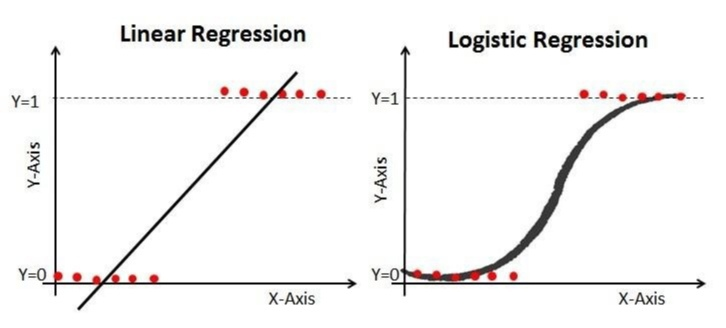

По сути, нам нужно из левой картинки сделать правую, применив
какое-нибудь преобразование, и тем самым мы сможем обучать
обычную линейную регрессию, которая будет пытаться
аппроксимировать классы 0 и 1.

То есть наша задача — из задачи регрессии c областью значений $(-\infty, +\infty)$ получить задачу классификации с областью значений $[0, 1]$.

#### Задание для самостоятельного решения (тригонометрическое преобразование)

Предложите какую-нибудь математическую функцию, основанную на тригонометрии (`sin`, `cos` и т.д.), которая бы осуществляла такое преобразование.

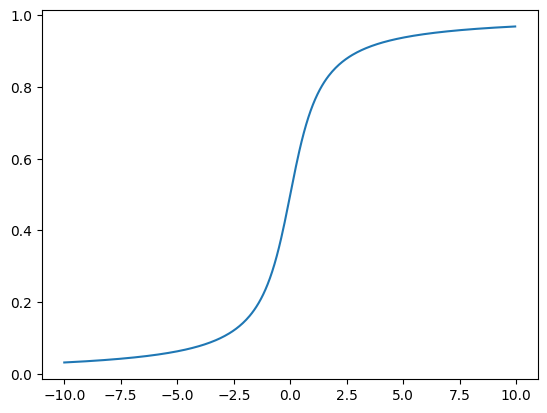

In [ ]:
import matplotlib.pyplot as plt

x = np.arange(-10, 10, 0.05)
y = # your code here

plt.plot(x, y);

Данная функция является непрерывной, вполне себе дифференцируемой, а значит спокойно могла бы использоваться в машинном обучении.

Тем не менее, в реальных задачах как правило применяется другая функция с аналогичными свойствами, которая также делает преобразование  $[0, 1] → (-\infty, +\infty)$ и которая называется сигмоидой.

Ниже мы с вами разберёмся в принципе работы сигмоиды, однако давайте, как самые последовательные люди, изначально пойдем в этой задаче с конца и научимся делать обратное преобразование: $[0, 1] → (-\infty, +\infty)$.

Итак:

1. $[0,1] → (0, +\infty)$ или «от вероятности к шансам»
    - Используем следующее преобразование: $odds_+ = \dfrac{p_+}{1-p_+}$, где $p_+ \in [0,1]$ — это вероятность положительного события.
    - Действительно, когда вероятность положительного события стремится к нулю, то и $odds_+$ стремится к нулю.
    - А когда вероятность стремится к одному, то $odds_+$ убегает в плюс бесконечность (потому что делим на очень маленькое число).

2. $(0, +\infty) → (-\infty, +\infty)$ или «от шансов к логарифму шансов»
    - Как можно догадаться из подзаголовка, все, что нам нужно сделать, — это взять логарифм $odds_+$, который в силу своих свойств будет в нуле аргумента равен $-\infty$, а на плюс бесконечности будет равен также $+\infty$.

3. $[0,1] → (-\infty, +\infty)$ или «собираем всё вместе»
    - Таким образом, мы перешли к $(-\infty, +\infty)$, а значит, перешли к языку задачи регрессии.
    - Единственное, что нам, по сути, осталось, — это собрать все преобразования вместе: $w^Tx = \ln(odds_+) = \ln\left(\dfrac{p_+}{1-p_+}\right)$, а это уже обычное уравнение с одной неизвестной.


#### Задание для самостоятельного решения (обратное преобразование вероятностей)

4. Ну, а теперь выразите вероятность положительного события из предыдущего пункта:

$$w^Tx = \ln\left(\frac{p_+}{1-p_+}\right) ⇒ <...ВАШЕ-РЕШЕНИЕ...>$$

На всякий случай, проверим себя и визуализируем получившуюся у нас формулу для сигмоиды:

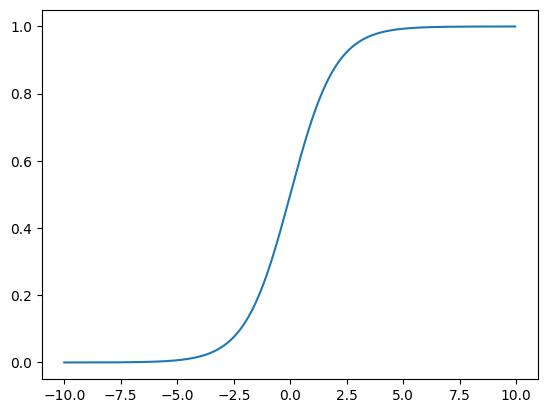

In [ ]:
def sigmoida(wTx):
    pass

x = np.arange(-10, 10, 0.05)
y = sigmoida(x)

plt.plot(x, y);

Итого, мы научились строить линейный классификатор, используя алгоритм построения линейной регрессиий. Мы молодцы!

### Логистическая регрессия и функция потерь

Итак, в рамках предыдущего пункта мы с вами нашли связь между задачей классификации и задачей регрессии в контексте линейных моделей.

Но что если зайти с другой стороны? Давайте посмотрим на задачу классификации с точки зрения теории вероятностей, ведь — в отличие от задачи регрессии — теперь у нас здесь есть величины, представляющие собой оценки вероятностей пренадлежности объектов к имеющимся классам.

Для того чтобы обсудить нашу задачу с этой стороны, вспомним важное понятие из теории вероятностей — функцию максимального правдоподобия. Итак, напомните, что же представляет собой данная функция?



Функция максимального правдоподобия — это функция, которая для заданного распределения с вектором неизвестных параметров получает состоятельную точечную оценку данных параметров на основе выборки. Проще говоря, максимизация этой функции позволяет нам определить наиболее реалистичные (правдоподобные, лучшие) параметры нужного нам распределения, отталкиваясь от наших данных.

$$L(x, \theta) = \prod_ip_{\theta}(x_i)$$



Только в нашем случае — возвращаясь назад к вопросу рассмотрения задачи классификации через призму теории вероятностей — в качестве параметров распределения внутри функции правдоподобия будут выступать параметры выбранной модели машинного обучения (которая по сути сама по себе и моделирует распределение); а в качестве элемента выборки $x_i$ — $i$-ый объект нашего датасета.

При этом поскольку задачу классификации можно легко свести к Схеме Бернулли (объясните как именно, да и что вообще за Схема Бернулли?) — то мы можем переписать функцию правдоподобия для нашего случая в следующем виде (здесь и далее $w$ — параметры модели, вместо параметров распределения, как мы обсудили выше):

$$L(x, w) = \prod_ip_{w}(x_i) = \prod_i p_i^{y_i}(1-p_i)^{1-y_i} → \max$$



Считать произведение — дело неблагодарное: получатся маленькие значения и машинная ошибка все испортит. Поэтому, как это всегда и делают, прологарифмируем функцию правдоподобия, а также умножим её на минус единицу, поскольку в математической оптимизации как правило ставится задача нахождения минимума, а не максимума функции.

По итогу получим следующую оптимизационную задачу:

$$-\sum_i \left(y_i\ln(p_i) + (1-y_i)\ln(1-p_i)\right) → \min$$

Выражение, представленное выше, называется `LogLoss`, и именно эта функция и является стандартной функцией потерь в рамках задачи классификации (так же, как, например, `MSE` или `MAE` для регрессии).



Давайте вместе убедимся, что `LogLoss` минимальна, когда мы все верно угадываем, и вообще, что эта функция в целом ведёт себя ожидаемым образом. Посчитайте потери на следующем примере и проанализируйте поведение функции (например, ответьте на вопрос, когда логарифм становится отрицательным?):

<center>

$y_{true}$ | P(y = 0) | P(y = 1)
------| ------|----------
1     | 0.9   | 0.1
0     | 0.3   | 0.7
0     | 0.5   | 0.5
1     | 0.04  | 0.96

</center>




In [21]:
# your code here

Подводя итог: теперь у нас с вами есть понимание, как использовать регрессию, чтобы получать разделение классов и вероятности принадлежности объектов к ним; а также есть выведенная функция потерь для обучения модели.

Такая модель в машинном обучении и называется **логистической регрессией**.

### Решение задачи классификации

Теперь, когда все теоретические аспекты были нами подсвечены и сполна обсуждены, мы с вами можем, наконец, вернуться к нашей исходной задаче — про которую, наверняка, вы уже забыли — и попробовать применить всё рассмотренное нами новое знание на практике! :)

Импортируем логистическую регрессию из модуля `linear_model` небезызвестной нам библиотеки `sklearn`.


In [22]:
from sklearn.linear_model import LogisticRegression

Создадим объект класса `LogisticRegression` с параметрами по умолчанию и обучим модель.


In [23]:
model_LR = LogisticRegression()

model_LR.fit(X_train, y_train)

LogisticRegression()

Получим предсказания модели и посмотрим на долю правильных ответов:


In [24]:
y_pred_test_LR = model_LR.predict(X_test)

print(f"Доля верно угаданных объектов {(y_pred_test_LR == y_test).sum() / len(y_test)}")

Доля верно угаданных объектов 0.7921631249232282


### Скейлинг данных

Что мы забыли? Мы забыли, что линейные модели сильно чувствительны к порядкам признаков, поэтому их обязательно необходимо масштабировать.

Для этих целей существует два самых популярных подхода:

 - $x_{new} = \dfrac{x - \mu}{\sigma}$, где $\mu, \sigma$ — это среднее и стандартное отклонение значений признака по выборке (см. функцию [scale](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.scale.html))

 - $x_{new} = \dfrac{x - x_{min}}{x_{max} - x_{min}}$, где $[x_{min}, x_{max}]$ — интервал значений признака.

Первый из этих двух подходов называется стандартизацией (и, кстати говоря, мы уже использовали неявно этот скейлер несколько раз в предыдущих семинарах); второй скейлер называется MinMax-Scaler и тоже применяется на практике довольно часто.

Импортируем класс `StandardScaler` из модуля `preprocessing` всё той же библиотеки `sklearn`


In [25]:
from sklearn.preprocessing import StandardScaler

Будем использовать данный скейлер и отмасштабируем наши признаки. Для начала создадим объект класса StandardScaler:

In [26]:
scaler = StandardScaler()

Теперь применим к нему метод `.fit()`. Данный метод позволит определить параметры выборки для скейлера по обучающим данным — в нашем случае это среднее и std.

In [27]:
scaler.fit(X_train)

StandardScaler()

Обратите внимание, что нередко дата саентисты — иногда даже сеньорные — допускают довольно грубую ошибку: применяют скейлер к данным до разделения выборки на train и test. Почему же, на самом деле, так нельзя делать ни в коем случае?

Применим метод `transform` нашего скейлера для непосредственного масштабирования как тренировочной, так и тестовой выборки:

In [28]:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Данные отнормированы, и теперь мы можем заново запустить наш пайплайн с логистической регрессией, а затем после получения новых предсказаний сравнить результаты с предыдущей итерацией.

In [29]:
model_LR = LogisticRegression()
model_LR.fit(X_train, y_train)
y_pred_test_LR = model_LR.predict(X_test)
y_pred_train_LR = model_LR.predict(X_train)

print(f"Доля верно угаданных объектов {(y_pred_test_LR == y_test).sum() / len(y_test)}")

Доля верно угаданных объектов 0.8457191991155878


Ну как, выросла точность? :)

## Метрики качества модели

Итак, с алгоритмом мы полностью разобрались. Теперь нужно поговорить про то, как бы мы могли оценить качество работы модели помимо собственно доли верно угаданных ответов — из лекции и из первого семинара по ML мы помним, что с этой Accuracy не всё так гладко.

Важный объект, к которому мы будем очень часто ссылаться в контексте метрик качества для классификации, — матрица ошибок или `confusion matrix`, содержащая в себе число верно и неверно помеченных объектов обоих классов.

Вот её общий вид с обозначениями:

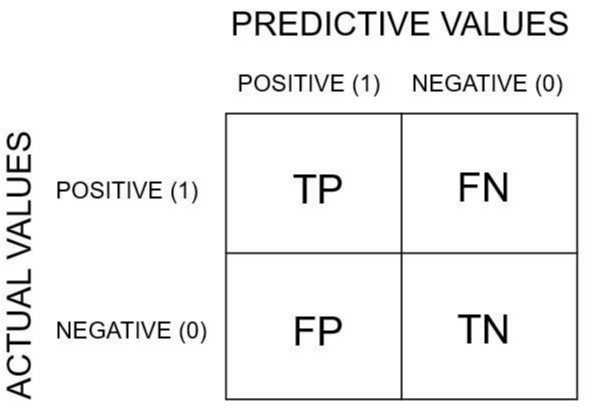

Здесь:
* `TP` — это `True Positive` или верно помеченные объекты класса 1 (положительного класса)
* `TN` — это `True Negative` или верно помеченные объекты класса 0 (отрицательного класса)
* `FP` — это `False Positive` или неверно помеченные объекты класса 0
* `FN` — это `False Negative` или неверно помеченные объекты класса 1

Построим матрицу ошибок для нашей задачи. Для этого импортируем стандартные библиотеки `seaborn` и `matplotlib`, а также специальную функцию `confusion_matrix` из модуля `metrics` библиотеки `sklearn`.

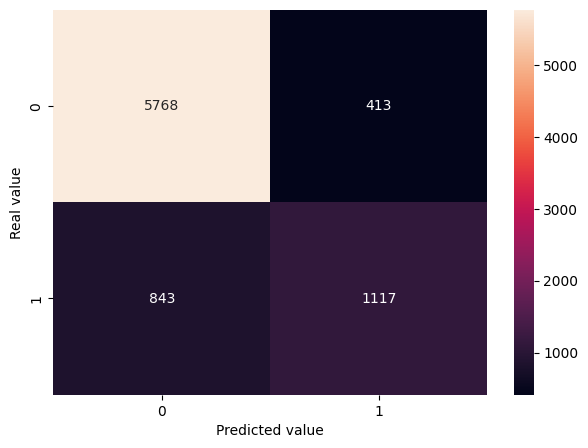

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

mp_mtx = confusion_matrix(y_test, y_pred_test_LR)

fig = plt.figure(figsize=(7,5))
sns.heatmap(mp_mtx, annot=True, fmt="d",
            xticklabels=df["salary"].unique(),
            yticklabels=df["salary"].unique())

plt.ylabel("Real value")
plt.xlabel("Predicted value");

### Accuracy

Для полноты картины начнем обсуждение метрик с самой `Accuracy` или *доли верно угаданных ответов*.

Формульно она выглядит следующим образом:

$$Accuracy = \dfrac{TP + TN}{TP + TN + FP + FN}$$



Посчитаем руками для следующей матрицы ошибок:

<center>

_ | True Class 1 | True Class 0
------| ------|----------
Predict Class 1 | 7  | 0
Predict Class 0 | 8  | 435

</center>

In [ ]:
# your code here

Данная метрика реализована в библиотеке `sklearn` в модуле `metrics`. Посчитаем её для нашей модели на обучающем и тестировочном кусках.

In [31]:
from sklearn.metrics import accuracy_score

print(f"TEST:  Accuracy — {accuracy_score(y_test, y_pred_test_LR)}")
print(f"TRAIN: Accuracy — {accuracy_score(y_train, y_pred_train_LR)}")

TEST:  Accuracy — 0.8457191991155878
TRAIN: Accuracy — 0.843939393939394


Совпадает ли результат на тесте с тем, что мы считали вручную ещё в предыдущем разделе?

### Precision

`Precision` или *точность* — это доля верно угаданных элементов положительного класса среди всех элементов, помеченных положительными. Данная метрика демонстрирует способность модели отличать класс от других классов.

Формульно она выглядит следующим образом:

$$Precision = \frac{TP}{TP + FP}$$

Когда эта метрика максимальна/минимальна? В каких диапазонах могут лежать ее значения?



Посчитаем руками для следующей матрицы ошибок:

<center>

_ | True Class 1 | True Class 0
------| ------|----------
Predict Class 1 | 7  | 0
Predict Class 0 | 8  | 435

</center>

In [32]:
# your code here

Данная метрика реализована в библиотеке `sklearn` в модуле `metrics`. Посчитаем её для нашей модели на обучающем и тестировочном кусках.

In [33]:
from sklearn.metrics import precision_score

print(f"TEST:  Precision — {precision_score(y_test, y_pred_test_LR)}")
print(f"TRAIN: Precision — {precision_score(y_train, y_pred_train_LR)}")

TEST:  Precision — 0.7300653594771241
TRAIN: Precision — 0.7189086294416244


Проинтерпретируйте полученные значения `Precision`. Почему они так уступают `Accuracy`?

### Recall

`Recall` или *полнота* — это доля верно помеченных объектов положительного класса среди всех объектов положительного класса. Данная метрика демонстрирует способность алгоритма
обнаруживать данный класс вообще.

Формульно она выглядит следующим образом:

$$Recall = \frac{TP}{TP + FN}$$

Когда эта метрика максимальна/минимальна? В каких диапазонах могут лежать ее значения?




Посчитаем руками для следующей матрицы ошибок:

<center>

_ | True Class 1 | True Class 0
------| ------|----------
Predict Class 1 | 7  | 0
Predict Class 0 | 8  | 435

</center>

In [34]:
# your code here

Данная метрика реализована в библиотеке `sklearn` в модуле `metrics`. Посчитаем её для нашей модели на обучающем и тестировочном кусках.

In [35]:
from sklearn.metrics import recall_score

print(f"TEST:  Recall — {recall_score(y_test, y_pred_test_LR)}")
print(f"TRAIN: Recall — {recall_score(y_train, y_pred_train_LR)}")

TEST:  Recall — 0.5698979591836735
TRAIN: Recall — 0.577962931474239


Проинтерпретируйте полученные значения `Recall`. Почему они настолько драматично уступают `Accuracy`?

### F1-score

У всех предыдущих метрик есть важный недостаток: каждая
из них демонстрирует качество работы очень разных аспектов
нашего классификатора. Мы видим, что, несмотря на то что `Accuracy` у нашей модели достаточно высокая, `Precision` и `Recall` имеют существенно более низкие значения.

Но как нам контролировать качество алгоритма не двумя или тремя метриками, а одной?

Для этого нам необходима такая метрика, которая показывала бы несмещенную оценку работы модели, а ещё, желательно, которая была бы устойчива к несбалансированным выборкам.

В качестве такой метрики мы можем попробовать взять `F1-score`!

`F1-score` или *f1-мера* — это среднее гармоническое точности и полноты. Данная метрика одинаково и сбалансированно учитывает важность точности и полноты, а потому показывает более четкую картину работы нашего алгоритма.

Формульно она выглядит следующим образом:

$$F_1 = 2 \cdot \frac{Precision \cdot Recall}{Precision + Recall}$$

Когда эта метрика максимальна/минимальна? В каких диапазонах могут лежать ее значения?



Посчитаем руками для следующей матрицы ошибок:

<center>

_ | True Class 1 | True Class 0
------| ------|----------
Predict Class 1 | 7  | 0
Predict Class 0 | 8  | 435

</center>

In [36]:
# your code here

Данная метрика реализована в библиотеке `sklearn` в модуле `metrics`. Посчитаем её для нашей модели на обучающем и тестировочном кусках.

In [37]:
from sklearn.metrics import f1_score

print(f"TEST:  Recall — {f1_score(y_test, y_pred_test_LR)}")
print(f"TRAIN: Recall — {f1_score(y_train, y_pred_train_LR)}")

TEST:  Recall — 0.6401146131805157
TRAIN: Recall — 0.6407766990291262


## K-Nearest Neighbors

Пока что сделаем небольшую (временную) паузу с метриками качества для задачи классификации и обратимся вновь к легендарному алгоритму, с которым мы уже хорошо знакомы.

На прошлом семинаре мы подробно погружались в принципы работы метрических алгоритмов — и KNN в частности — и говорили о том, что пространство, на котором мы рассматриваем задачу для такого алгоритма, должно быть метрическим — то есть на нем должна быть задана некая мера расстояния. Всё то же самое справедливо и для KNN-классификатора.

По большому счёту главное отличие KNN-классификатора от KNN-регрессора заключается в том, что в качестве функции аггрегирования по ответам ближайших соседей берется не среднее арифметическое, а `mode` (оно же самое частое значение, оно же принцип голосования). Иными словами — объекту сопоставляется доминирующий класс из его окружения.



#### Вопрос

Однако какое ограничение накладывает такой подход? Можем ли мы смотреть на 1/2/3/4 соседей?

Тем не менее, не считая данного аспекта, в остальном, KNN-классификатор максимально похож на KNN-регрессор и работает, по сути, абсолютно по тем же принципам.

Итак, импортируем `knn`-классификатор из модуля `neighbors` библиотеки `sklearn`:




In [38]:
from sklearn.neighbors import KNeighborsClassifier

Создадим объект класса `KNeighborsClassifier` с числом соседей равным 3, обучим модель и сделаем предсказания (3 классических шага любой модели ML). Посмотрим `Accuracy` результата работы модели на обучении и на тесте.

In [39]:
model_knn = KNeighborsClassifier(3)

model_knn.fit(X_train, y_train)

y_pred_train_KNN = model_knn.predict(X_train)
y_pred_test_KNN  = model_knn.predict(X_test)

print(f"TEST:  Accuracy — {accuracy_score(y_test, y_pred_test_KNN)}")
print(f"TRAIN: Accuracy — {accuracy_score(y_train, y_pred_train_KNN)}")

TEST:  Accuracy — 0.8148876059452156
TRAIN: Accuracy — 0.8956592956592957


Неплохо! Качество по `Accuracy` совсем недурное, да и вдобавок у нас теперь есть несколько моделей для последующего сравнения их друг с другом.

## ROC-AUC

Ну что же, мы с вами, наконец, готовы обсудить одну из самых эффективных и часто используемых метрик качества для классификации — `ROC-AUC`.

`ROC-AUC` или *площадь под ROC кривой* — это мера, показывающая, насколько точно упорядочены элементы
выборки по своим вероятностям (скорам).

Алгоритм построения ROC кривой двольно простой:
1. Делаем предсказания моделью и получаем вероятности принадлежности объекта к положительному классу.
2. Делим отрезок [0,1] на оси х на число частей, равное количеству элементов отрицательного класса; на оси у — на число частей, равное количеству элементов положительного класса.
3. Сортируем объекты по полученным вероятностям по убыванию.
4. Если есть элементы с одинаковыми вероятностями, то
группируем их вместе.
5. Идем по таблице со сгруппированными вероятностями:
    - Если реальный класс рассматриваемого объекта положительный, то делаем шаг вверх;
    - Если реальный класс рассматриваемого объекта отрицательный, то делаем шаг вправо;
    - Если мы рассматриваем группу объектов, то делаем шаг по диагонали на нужное число клеток вправо и вверх;
6. Получившаяся кривая выходит из [0,0] и приходит в [1,1].
Площадь под ней и называется `ROC-AUC`.


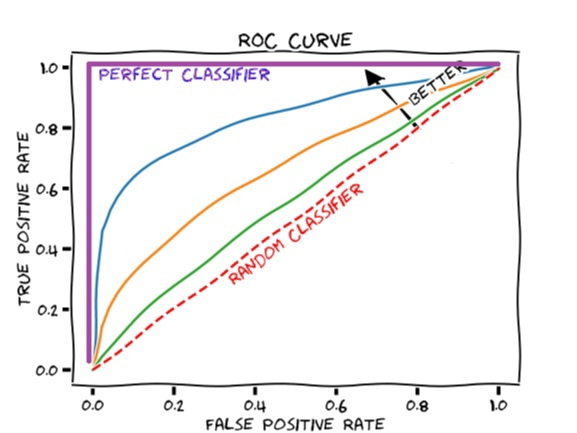

Когда эта метрика максимальна/минимальна? В каких диапазонах могут лежать ее значения?

### Задание для самостоятельного решения (ROC-AUC)

Посчитайте руками `ROC-AUC` для следующей матрицы ошибок:

<center>

| True Class | Predict Prob Class 1|
|:------:|:----------:|
| 1  | 0.9|
| 1  | 0.8|
| 0  | 0.7|
| 1  | 0.6|
| 1  | 0.5|
| 0  | 0.4|
| 0  | 0.4|
| 1  | 0.3|
| 0  | 0.1|

    # your solution here

Более подробно про `ROC-AUC` можно прочитать [здесь](https://dyakonov.org/2017/07/28/auc-roc-%D0%BF%D0%BB%D0%BE%D1%89%D0%B0%D0%B4%D1%8C-%D0%BF%D0%BE%D0%B4-%D0%BA%D1%80%D0%B8%D0%B2%D0%BE%D0%B9-%D0%BE%D1%88%D0%B8%D0%B1%D0%BE%D0%BA/)  или посмотреть [здесь](https://www.youtube.com/watch?v=V31tK9CgI6c).

### ROC-AUC для логистической регрессии и модели KNN

Теперь, когда мы разобрались с теоретическим обоснованием метрики, можно применить её к двум нашим моделям: логистической регрессии и KNN-классификатору (попробуем сделать это, даже несмотря на то что мы не обсуждали подробно алгоритм нахождения вероятностей для KNN).

Для `ROC-AUC` нам нужны вероятности принадлежности объекта положительному классу, поэтому для их получения воспользуемся методом `predict_proba` (и нам потребуется второй столбец).

In [40]:
from sklearn.metrics import roc_auc_score

y_pred_prob_test_LR = model_LR.predict_proba(X_test)[:, 1]
y_pred_prob_test_KNN = model_knn.predict_proba(X_test)[:, 1]
y_pred_prob_train_LR = model_LR.predict_proba(X_train)[:, 1]
y_pred_prob_train_KNN = model_knn.predict_proba(X_train)[:, 1]

print("Logistic Regression")
print(f"TEST:  ROC-AUC — {roc_auc_score(y_test, y_pred_prob_test_LR)}")
print(f"TRAIN: ROC-AUC — {roc_auc_score(y_train, y_pred_prob_train_LR)}")
print("kNN")
print(f"TEST:  ROC-AUC — {roc_auc_score(y_test, y_pred_prob_test_KNN)}")
print(f"TRAIN: ROC-AUC — {roc_auc_score(y_train, y_pred_prob_train_KNN)}")

Logistic Regression
TEST:  ROC-AUC — 0.8934340837127603
TRAIN: ROC-AUC — 0.8967214884041701
kNN
TEST:  ROC-AUC — 0.8069366623853877
TRAIN: ROC-AUC — 0.9543989027611741


Заодно давайте построим саму ROC-кривую. Это наглядный способ понять, насколько хорошо работает ваш алгоритм.


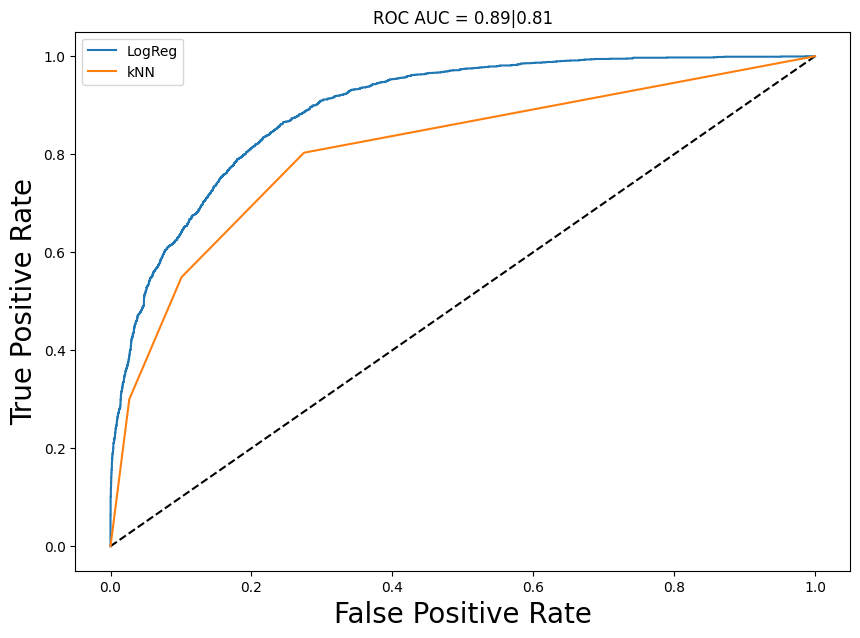

In [41]:
from sklearn.metrics import roc_curve, auc

fpr_lr, tpr_lr, _ = roc_curve(y_test, y_pred_prob_test_LR)
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_prob_test_KNN)

plt.figure(figsize=(10, 7))
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr_lr, tpr_lr, label="LogReg")
plt.plot(fpr_knn, tpr_knn, label="kNN")
plt.title(f'ROC AUC = {round(auc(fpr_lr, tpr_lr),2)}|{round(auc(fpr_knn, tpr_knn), 2)}')
plt.ylabel("True Positive Rate", fontsize=20)
plt.xlabel("False Positive Rate", fontsize=20)
plt.legend()
plt.show()

Итого, мы решили задачу бинарной классификации, используя две разные модели, подробно их обсудили, а также посмотрели все популярные метрики качества для задачи классфикации. Мы — молодцы! :)